# Phenotypic phase plane analysis
## iCW773

In [13]:
from colorama import init, Fore, Style
from cobra import Model, Reaction
from cobra.io import read_sbml_model
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [14]:
from cobra.flux_analysis.phenotype_phase_plane import production_envelope

In [15]:
model = read_sbml_model('/Users/macintosh/Downloads/iCGB21FR.xml')

lys_exp_rxn = Reaction("LYSt3r")
lys_exp_rxn.name = "L lysine transport out via proton antiport reversible"
lys_exp_rxn.add_metabolites({model.metabolites.h_e: -1, model.metabolites.lys__L_c: -1, model.metabolites.h_c: 1, model.metabolites.lys__L_e: 1})
lys_exp_rxn.gene_reaction_rule = "( Mbar_A2583 or Mbar_A3244 )"
lys_exp_rxn.lower_bound, lys_exp_rxn.upper_bound = 0, 1000

model.add_reactions([lys_exp_rxn])

SBML package 'layout' not supported by cobrapy, information is not parsed
https://juser.fz-juelich.de/record/188973 does not conform to 'http(s)://identifiers.org/collection/id' or'http(s)://identifiers.org/COLLECTION:id


In [16]:
model.reactions.Growth # Biomass model iCW773

Reaction identifier,Growth
Name,
Memory address,0x283afc810
Stoichiometry,0.000215957436615497 10fthf_c + 0.497466186805283 ala__L_c + 0.000215957436615497 amet_c + 0.0062974490405647 amp_c + 0.286450592337987 arg__L_c + 0.233442241629366 asn__L_c + 0.233442241629366... 0.000215957436615497 10-Formyltetrahydrofolate + 0.497466186805283 L-Alanine + 0.000215957436615497 S-Adenosyl-L-methionine + 0.0062974490405647 AMP + 0.286450592337987 L-Arginine +...
GPR,
Lower bound,0.0
Upper bound,1000.0


In [17]:
model.medium # Medium model iCW773

{'EX_glc__D_e': 10.0,
 'EX_h2o_e': 10.0,
 'EX_h_e': 10.0,
 'EX_cl_e': 10.0,
 'EX_pi_e': 10.0,
 'EX_nh4_e': 10.0,
 'EX_fe3_e': 10.0,
 'EX_k_e': 10.0,
 'EX_ca2_e': 10.0,
 'EX_mg2_e': 10.0,
 'EX_mn2_e': 10.0,
 'EX_zn2_e': 10.0,
 'EX_cu2_e': 10.0,
 'EX_o2_e': 10.0,
 'EX_fe2_e': 10.0,
 'EX_so4_e': 10.0,
 'EX_urea_e': 10.0,
 'EX_btn_e': 10.0,
 'EX_na1_e': 10.0,
 'EX_ni2_e': 10.0,
 'EX_34dhbz_e': 10.0}

### Aerobic conditions

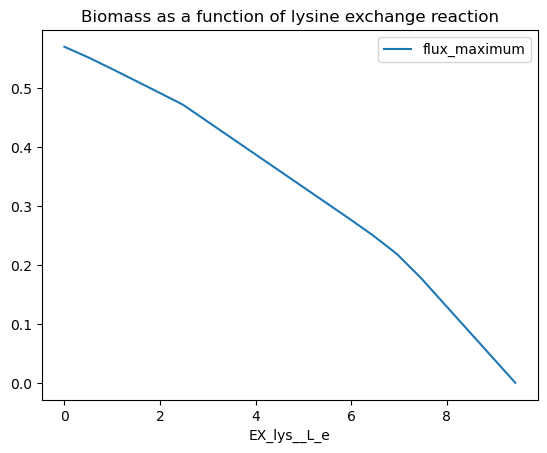

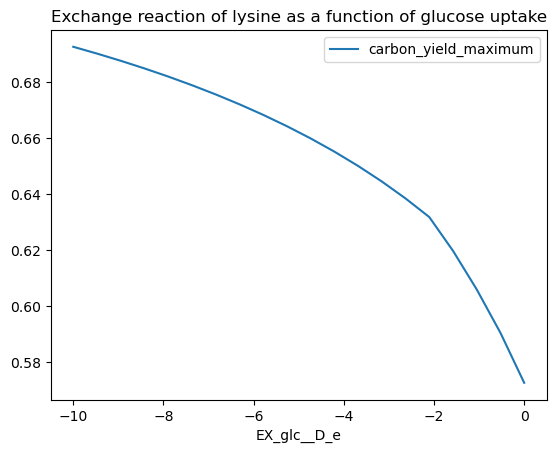

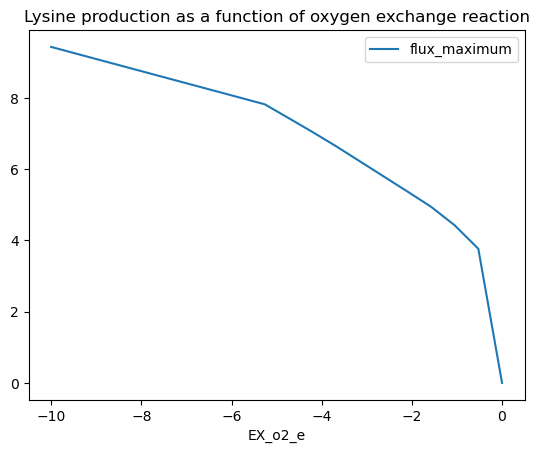

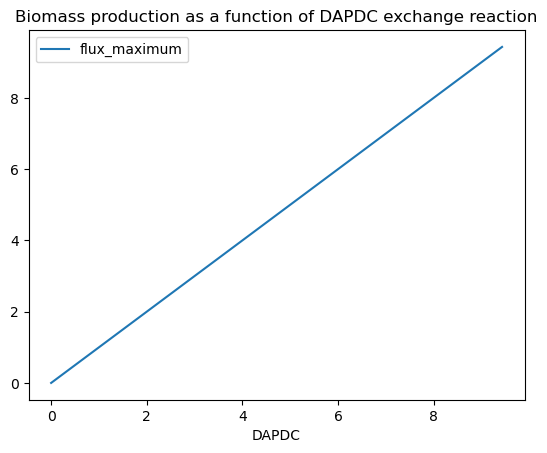

In [22]:
medium = model.medium
with model:
    model.medium = medium
    model.objective = model.reactions.EX_lys__L_e
    lys_production = model.optimize().objective_value
    ppp_BIOMASS = production_envelope(model,
                    reactions=[model.reactions.EX_lys__L_e],
                    objective=model.reactions.Growth)
    ppp_LYS = production_envelope(model,
                    reactions=[model.reactions.EX_glc__D_e],
                    objective=model.reactions.EX_lys__L_e)
    ppp_o2 = production_envelope(model,
                    reactions=[model.reactions.EX_o2_e],
                    objective=model.reactions.EX_lys__L_e)
    ppp_DAPDC = production_envelope(model,
                    reactions=[model.reactions.DAPDC],
                    objective=model.reactions.EX_lys__L_e)
    
    ppp_BIOMASS.plot(x='EX_lys__L_e', y='flux_maximum', title = 'Biomass as a function of lysine exchange reaction' ) #carbon yield of biomass as function of glucose uptake
    ppp_LYS.plot(x='EX_glc__D_e', y='carbon_yield_maximum', title = 'Exchange reaction of lysine as a function of glucose uptake') #carbon yield of lysine as function of glucose uptake
    ppp_o2.plot(x='EX_o2_e', y='flux_maximum', title = 'Lysine production as a function of oxygen exchange reaction')
    ppp_DAPDC.plot(x='DAPDC', y='flux_maximum', title = 'Biomass production as a function of DAPDC exchange reaction')

In the first figure we observe that there a correlation between biomass production and lysine production. The more carbon goes to lysine production, the less goes to biomass.

In the second figure we see that when the glucose is consumed, we have a reduction on production of lysine.

In the third figure we see that there is high lysine production when there is low oxygen. It started to decrease the flux at higher level of oxygen.

In the fourth figure biomass starts to incresase while the production of DAPDC it's low. Then the carbon goes to the production of enzyme DAPDC, and the biomass increases.

### Anaerobic conditions

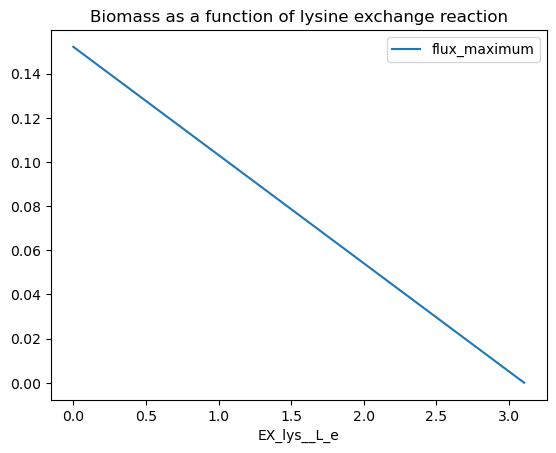

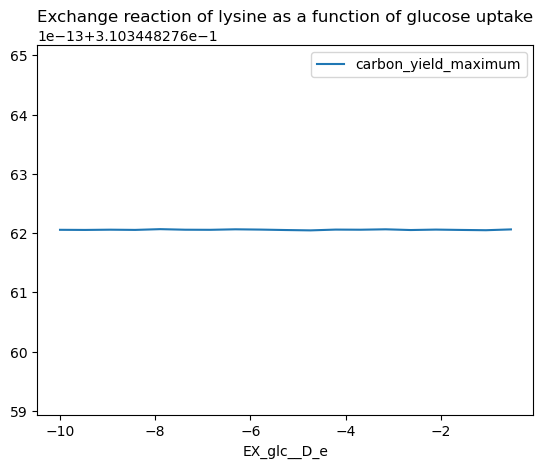

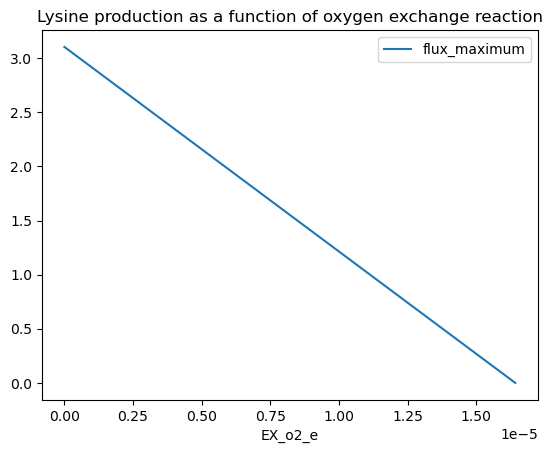

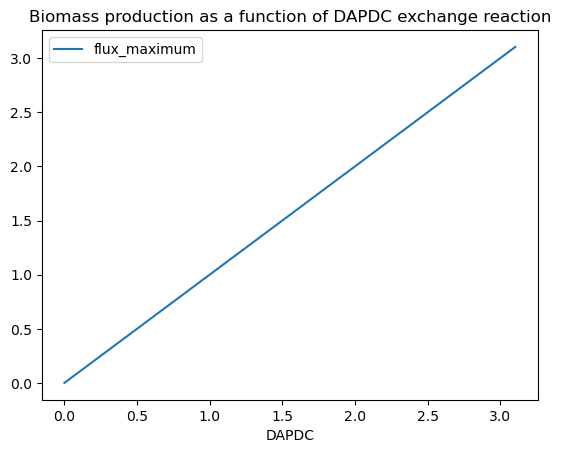

In [27]:
medium2 = model.medium
with model:
    medium2['EX_o2_e'] = 0
    model.medium = medium2
    model.objective = model.reactions.EX_lys__L_e
    lys_production = model.optimize().objective_value
    ppp_BIOMASS = production_envelope(model,
                    reactions=[model.reactions.EX_lys__L_e],
                    objective=model.reactions.Growth)
    ppp_LYS = production_envelope(model,
                    reactions=[model.reactions.EX_glc__D_e],
                    objective=model.reactions.EX_lys__L_e)
    ppp_o2 = production_envelope(model,
                    reactions=[model.reactions.EX_o2_e],
                    objective=model.reactions.EX_lys__L_e)
    ppp_DAPDC = production_envelope(model,
                    reactions=[model.reactions.DAPDC],
                    objective=model.reactions.EX_lys__L_e)

    ppp_BIOMASS.plot(x='EX_lys__L_e', y='flux_maximum', title = 'Biomass as a function of lysine exchange reaction' ) #carbon yield of biomass as function of glucose uptake
    ppp_LYS.plot(x='EX_glc__D_e', y='carbon_yield_maximum', title = 'Exchange reaction of lysine as a function of glucose uptake') #carbon yield of lysine as function of glucose uptake
    ppp_o2.plot(x='EX_o2_e', y='flux_maximum', title = 'Lysine production as a function of oxygen exchange reaction')
    ppp_DAPDC.plot(x='DAPDC', y='flux_maximum', title = 'Biomass production as a function of DAPDC exchange reaction')

In the first figure we observe that there's a inversely proportional relationship between biomass production and lysine production. The more carbon goes to lysine production, the less goes to biomass. But the production is lower under anaeroic conditions, since this synthesis process by Corynebacterium glutamicum is aerobic.

In the second figure we see that there is no change in the lysine at any range, which fits the anaerobic conditions to produce lysine.

In the third figure we see that there's a inversely proportional relationship, the more oxygen, the less lysine exchange reaction.

In the fourth figure biomass starts to incresase while the production of DAPDC it's low. Then the carbon goes to the production of enzyme DAPDC, and the biomass increases.